In [30]:
import csv
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import time

In [31]:
import warnings
warnings.filterwarnings("ignore")

# create binary datasets

In [32]:
def folder(f_name): #this function creates a folder.
    try:
        if not os.path.exists(f_name):
            os.makedirs(f_name)
    except OSError:
        print ("The folder could not be created!")

In [33]:
def target_name(name):
    df = pd.read_csv(name,usecols=["Label"])
    target_names=sorted(list(df["Label"].unique()))
    target_names = list(map(str, target_names))
    #print(target_names)
    return target_names
train="./Aalto_train_IoTDevID.csv"
device_names=target_name(train)

In [34]:
folder("devicebasedcsvs")
folder("tree")
folder("results")

In [35]:

for device in device_names:
    print(device)
    df=pd.read_csv(train)
    #print(df.groupby("Label").size())
    k= df['Label'].values==device
    del df["MAC"]
    k=list(k*1)
    size=k.count(1)
    df['Label']=k
    if size>1000:
        size=1000
    dev=df[df["Label"]==1]
    notdev=df[df["Label"]==0]
    dev=dev.sample(n=size, random_state=1)
    notdev=notdev.sample(n=size*5, random_state=1)
    df = pd.concat([dev, notdev])
    #df=df.groupby('Label').apply(lambda x: x.sample(n=size)).reset_index(drop = True)
    df.to_csv("./devicebasedcsvs/"+device+".csv",  index=False)


Aria
D-LinkCam
D-LinkDayCam
D-LinkDoorSensor
D-LinkHomeHub
D-LinkSensor
D-LinkSiren
D-LinkSwitch
D-LinkWaterSensor
EdimaxCam
EdimaxPlug1101W
EdimaxPlug2101W
EdnetCam
EdnetGateway
HomeMaticPlug
HueBridge
HueSwitch
IKettle2
Lightify
MAXGateway
SmarterCoffee
TP-LinkPlugHS100
TP-LinkPlugHS110
WeMoInsightSwitch
WeMoLink
WeMoSwitch
Withings


# create decision tree diagrams

In [36]:
from sklearn import tree
import graphviz
from graphviz import render

def ciz(name,model,feature_names,target_names):

    dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=feature_names,  
                                class_names=target_names,
                                filled=True)

    # Draw graph
    #graph = graphviz.Source(dot_data) 
    graph = graphviz.Source(dot_data,format='pdf')    
    name="./tree/"+name[18:-4]
    graph.render(name, view=True)  

# ML Application

In [37]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from random import random
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier

In [38]:
def find_the_way(path,file_format):
    files_add = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if file_format in file:
                files_add.append(os.path.join(r, file))  
    return files_add
name_list=find_the_way('./devicebasedcsvs','.csv')
name_list

['./devicebasedcsvs\\Aria.csv',
 './devicebasedcsvs\\D-LinkCam.csv',
 './devicebasedcsvs\\D-LinkDayCam.csv',
 './devicebasedcsvs\\D-LinkDoorSensor.csv',
 './devicebasedcsvs\\D-LinkHomeHub.csv',
 './devicebasedcsvs\\D-LinkSensor.csv',
 './devicebasedcsvs\\D-LinkSiren.csv',
 './devicebasedcsvs\\D-LinkSwitch.csv',
 './devicebasedcsvs\\D-LinkWaterSensor.csv',
 './devicebasedcsvs\\EdimaxCam.csv',
 './devicebasedcsvs\\EdimaxPlug1101W.csv',
 './devicebasedcsvs\\EdimaxPlug2101W.csv',
 './devicebasedcsvs\\EdnetCam.csv',
 './devicebasedcsvs\\EdnetGateway.csv',
 './devicebasedcsvs\\HomeMaticPlug.csv',
 './devicebasedcsvs\\HueBridge.csv',
 './devicebasedcsvs\\HueSwitch.csv',
 './devicebasedcsvs\\IKettle2.csv',
 './devicebasedcsvs\\Lightify.csv',
 './devicebasedcsvs\\MAXGateway.csv',
 './devicebasedcsvs\\SmarterCoffee.csv',
 './devicebasedcsvs\\TP-LinkPlugHS100.csv',
 './devicebasedcsvs\\TP-LinkPlugHS110.csv',
 './devicebasedcsvs\\WeMoInsightSwitch.csv',
 './devicebasedcsvs\\WeMoLink.csv',
 './devi

In [39]:
ml_list={"DT":DecisionTreeClassifier()}

In [40]:
def score(altime,train_time,test_time,predict,y_test,class_based_results,i,cv,dname,ii):
    precision=[]
    recall=[]
    f1=[]
    accuracy=[]
    total_time=[]
    kappa=[]
    accuracy_b=[]
    
    rc=sklearn.metrics.recall_score(y_test, predict,average= "macro")
    pr=sklearn.metrics.precision_score(y_test, predict,average= "macro")
    f_1=sklearn.metrics.f1_score(y_test, predict,average= "macro")        
    report = classification_report(y_test, predict, target_names=target_names,output_dict=True)
    cr = pd.DataFrame(report).transpose()
    if class_based_results.empty:
        class_based_results =cr
    else:
        class_based_results = class_based_results.add(cr, fill_value=0)
    precision.append(float(pr))
    recall.append(float(rc))
    f1.append(float(f_1))
    accuracy_b.append(balanced_accuracy_score( y_test,predict))
    accuracy.append(accuracy_score(y_test, predict))
    #clf.score(X_test, y_test))
    #print(balanced_accuracy_score( y_test,predict))
    #t_time.append(float((time.time()-second)) )
    kappa.append(round(float(sklearn.metrics.cohen_kappa_score(y_test, predict, 
    labels=None, weights=None, sample_weight=None)),15))
    print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s%-8s' % (dname,i,cv,ii[0:6],str(round(np.mean(accuracy),2)),str(round(np.mean(accuracy_b),2)),
        str(round(np.mean(precision),2)), str(round(np.mean(recall),2)),str(round(np.mean(f1),2)), 
        str(round(np.mean(kappa),2)),str(round(np.mean(train_time),2)),str(round(np.mean(test_time),2)),str(round(np.mean(test_time)+np.mean(train_time),2)),str(round(np.mean(altime),2))))
    lines=(str(dname)+","+str(i)+","+str(cv)+","+str(ii)+","+str(round(np.mean(accuracy),15))+","+str(round(np.mean(accuracy_b),15))+","+str(round(np.mean(precision),15))+","+ str(round(np.mean(recall),15))+","+str(round(np.mean(f1),15))+","+str(round(np.mean(kappa),15))+","+str(round(np.mean(train_time),15))+","+str(round(np.mean(test_time),15))+","+str(round(np.mean(test_time)+np.mean(train_time),15))+","+str(altime)+"\n")
    return lines,class_based_results

In [41]:
def ML(loop1,loop2,output_csv,cols,step,Tree):
    fold=10
    ths = open(output_csv, "w")
    ths.write("Dataset,T,CV,ML_algorithm,Acc,b_Acc,Precision, Recall , F1-score, kappa ,tra-Time,test-Time,total-Time,Al-Time\n")
    repetition=1


    from sklearn.metrics import balanced_accuracy_score
    from sklearn.preprocessing import Normalizer
    print ('%-15s %-3s %-3s %-6s  %-5s %-5s %-5s %-5s %-5s %-5s %-8s %-8s%-8s%-8s'%
               ("Dataset","T","CV","ML_alg","Acc","b_Acc","Prec", "Rec" , "F1", "kap" ,"tra-T","test-T","total","al-time"))

    for ii in ml_list:
        class_based_results=pd.DataFrame()#"" #pd.DataFrame(0, index=np.arange((len(target_names)+3)), columns=["f1-score","precision","recall","support"])
        cm=pd.DataFrame()
        cv=0
        for i in range(repetition):
            rnd = random()
            kfold = KFold(fold, True, int(rnd*100))  
            cv=0
            df = pd.read_csv(loop1,usecols=cols)#,header=None )
            #del df["MAC"] # if dataset has MAC colomn please uncomment this line
            feature_names=df.columns
            feature_names=feature_names[0:-1]
            X =df[df.columns[0:-1]]
            X=np.array(X)
            df[df.columns[-1]] = df[df.columns[-1]].astype('category')
            y=df[df.columns[-1]].cat.codes  
            #scaler = Normalizer().fit(X)
            #X = scaler.transform(X)
            # summarize transformed data
            dname=loop1[18:-4]
            X.shape
            for train_index, test_index in kfold.split(X):

                X_train, X_test = X[train_index], X[test_index]
                y_train, y_test = y[train_index], y[test_index]  

      


                #dname=loop1  [6:-13]  
                results_y=[]
                
                results_y.append(y_test)


                precision=[]
                recall=[]
                f1=[]
                accuracy=[]
                train_time=[]
                test_time=[]
                total_time=[]
                kappa=[]
                accuracy_b=[]

                #machine learning algorithm is applied in this section
                clf = ml_list[ii]#choose algorithm from ml_list dictionary
                second=time.time()
                clf.fit(X_train, y_train)
                train_time.append(float((time.time()-second)) )
                second=time.time()
                predict =clf.predict(X_test)
                test_time.append(float((time.time()-second)) )
                
                
                if Tree:
                    if cv==1:# creates a decision tree for the first step of cross-validation.
                        ciz(loop1,clf,feature_names,target_names)
                cv+=1
         
                altime=0
                lines,class_based_results=score(altime,train_time,test_time,predict,y_test,class_based_results,i,cv,dname,ii)

                ths.write (lines)






                df_cm = pd.DataFrame(confusion_matrix(y_test, predict))
                results_y.append(predict)
                if cm.empty:
                    cm =df_cm
                else:
                    cm = cm.add(df_cm, fill_value=0)


        print(class_based_results/(repetition*fold)) 
        graph_name=output_csv[:-4]+".pdf"     
        plt.figure(figsize = (5,3.5))
        sns.heatmap(cm,xticklabels=target_names, yticklabels=target_names,fmt='', annot=True)
        #plt.savefig(graph_name,bbox_inches='tight')#, dpi=400)
        plt.show()
        #print(cm)
        print("\n\n\n") 
    ths.close()  

In [42]:
features=['pck_size', 'Ether_type', 'LLC_dsap', 'LLC_ssap', 'LLC_ctrl',
       'EAPOL_version', 'EAPOL_type', 'EAPOL_len', 'IP_version', 'IP_ihl',
       'IP_tos', 'IP_len', 'IP_flags', 'IP_Z', 'IP_MF', 'IP_DF', 'IP_frag',
       'IP_ttl', 'IP_proto', 'IP_options', 'ICMP_type',
       'ICMP_code', 'ICMP_chksum', 'ICMP_id', 'ICMP_seq', 'ICMP_ts_ori',
       'ICMP_ts_rx', 'ICMP_ts_tx', 'ICMP_ptr', 'ICMP_reserved', 'ICMP_length',
        'ICMP_nexthopmtu', 'ICMP_unused', 'TCP_seq',"IP_id",
       'TCP_ack', 'TCP_dataofs', 'TCP_reserved', 'TCP_flags', 'TCP_FIN',
       'TCP_SYN', 'TCP_RST', 'TCP_PSH', 'TCP_ACK', 'TCP_URG', 'TCP_ECE',
       'TCP_CWR', 'TCP_window', 'TCP_chksum', 'TCP_urgptr', 'TCP_options',
       'UDP_len', 'UDP_chksum', 'DHCP_options', 'BOOTP_op', 'BOOTP_htype',
       'BOOTP_hlen', 'BOOTP_hops', 'BOOTP_xid', 'BOOTP_secs', 'BOOTP_flags',
       'BOOTP_sname', 'BOOTP_file', 'BOOTP_options', 'DNS_length', 'DNS_id',
       'DNS_qr', 'DNS_opcode', 'DNS_aa', 'DNS_tc', 'DNS_rd', 'DNS_ra', 'DNS_z',
       'DNS_ad', 'DNS_cd', 'DNS_rcode', 'DNS_qdcount', 'DNS_ancount',
       'DNS_nscount', 'DNS_arcount', 'sport_class', 'dport_class',
       'sport', 'dport', 'TCP_sport', 'TCP_dport', 'UDP_sport',
       'UDP_dport', 'payload_bytes', 'entropy', 'Protocol', 'Label']

In [43]:
len(features)

92

Dataset         T   CV  ML_alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   al-time 
Aria            0   1   DT      0.99  0.98  0.98  0.98  0.98  0.97  0.0      0.0     0.0     0.0     
Aria            0   2   DT      0.99  0.98  0.98  0.98  0.98  0.97  0.0      0.0     0.0     0.0     
Aria            0   3   DT      0.99  0.99  0.97  0.99  0.98  0.96  0.01     0.0     0.01    0.0     
Aria            0   4   DT      1.0   0.99  1.0   0.99  0.99  0.98  0.01     0.0     0.01    0.0     
Aria            0   5   DT      0.99  0.99  0.96  0.99  0.98  0.95  0.0      0.0     0.0     0.0     
Aria            0   6   DT      0.99  0.99  0.97  0.99  0.98  0.97  0.0      0.0     0.01    0.0     
Aria            0   7   DT      1.0   1.0   1.0   1.0   1.0   1.0   0.0      0.0     0.0     0.0     
Aria            0   8   DT      0.98  0.97  0.94  0.97  0.96  0.91  0.0      0.0     0.0     0.0     
Aria            0   9   DT      1.0   1.0   0.99  1.0   0.99  0.99  0.01     0.0  

D-LinkSensor    0   8   DT      0.92  0.87  0.87  0.87  0.87  0.75  0.06     0.0     0.06    0.0     
D-LinkSensor    0   9   DT      0.95  0.92  0.9   0.92  0.91  0.83  0.08     0.0     0.08    0.0     
D-LinkSensor    0   10  DT      0.93  0.89  0.87  0.89  0.88  0.76  0.05     0.0     0.05    0.0     
              precision    recall  f1-score     support
0              0.966529  0.959031  0.962737  500.000000
1              0.802627  0.833611  0.817226  100.000000
accuracy       0.938167  0.938167  0.938167    0.938167
macro avg      0.884578  0.896321  0.889981  600.000000
weighted avg   0.939571  0.938167  0.938691  600.000000




Dataset         T   CV  ML_alg  Acc   b_Acc Prec  Rec   F1    kap   tra-T    test-T  total   al-time 
D-LinkSiren     0   1   DT      0.91  0.84  0.86  0.84  0.85  0.7   0.05     0.0     0.05    0.0     
D-LinkSiren     0   2   DT      0.96  0.92  0.92  0.92  0.92  0.84  0.05     0.0     0.05    0.0     
D-LinkSiren     0   3   DT      0.94  0.91  0.89

EdimaxPlug2101W 0   5   DT      0.99  0.99  0.98  0.99  0.98  0.96  0.04     0.0     0.04    0.0     
EdimaxPlug2101W 0   6   DT      0.98  0.97  0.97  0.97  0.97  0.94  0.04     0.0     0.04    0.0     
EdimaxPlug2101W 0   7   DT      0.98  0.97  0.96  0.97  0.96  0.92  0.04     0.0     0.04    0.0     
EdimaxPlug2101W 0   8   DT      0.97  0.97  0.94  0.97  0.95  0.9   0.04     0.0     0.04    0.0     
EdimaxPlug2101W 0   9   DT      0.98  0.99  0.95  0.99  0.97  0.94  0.03     0.0     0.03    0.0     
EdimaxPlug2101W 0   10  DT      0.97  0.95  0.96  0.95  0.95  0.9   0.03     0.0     0.03    0.0     
              precision    recall  f1-score     support
0              0.990492  0.986391  0.988411  382.000000
1              0.933802  0.954735  0.943579   76.400000
accuracy       0.980802  0.980802  0.980802    0.980802
macro avg      0.962147  0.970563  0.965995  458.400000
weighted avg   0.981242  0.980802  0.980884  458.400000




Dataset         T   CV  ML_alg  Acc   b_Acc Prec

IKettle2        0   2   DT      0.99  0.97  0.99  0.97  0.98  0.96  0.0      0.0     0.0     0.0     
IKettle2        0   3   DT      0.97  0.98  0.94  0.98  0.96  0.92  0.01     0.0     0.01    0.0     
IKettle2        0   4   DT      0.99  0.99  0.96  0.99  0.97  0.95  0.0      0.0     0.0     0.0     
IKettle2        0   5   DT      1.0   1.0   1.0   1.0   1.0   1.0   0.0      0.0     0.0     0.0     
IKettle2        0   6   DT      0.99  0.99  0.96  0.99  0.98  0.95  0.02     0.0     0.02    0.0     
IKettle2        0   7   DT      1.0   1.0   1.0   1.0   1.0   1.0   0.0      0.0     0.0     0.0     
IKettle2        0   8   DT      0.99  0.99  0.97  0.99  0.98  0.96  0.0      0.0     0.0     0.0     
IKettle2        0   9   DT      1.0   1.0   1.0   1.0   1.0   1.0   0.0      0.0     0.0     0.0     
IKettle2        0   10  DT      1.0   1.0   1.0   1.0   1.0   1.0   0.0      0.0     0.0     0.0     
              precision    recall  f1-score   support
0              0.998246  0.9

WeMoInsightSwitch 0   1   DT      0.96  0.94  0.92  0.94  0.93  0.86  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   2   DT      0.97  0.94  0.94  0.94  0.94  0.87  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   3   DT      0.96  0.94  0.95  0.94  0.94  0.89  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   4   DT      0.98  0.94  0.97  0.94  0.96  0.91  0.02     0.0     0.02    0.0     
WeMoInsightSwitch 0   5   DT      0.96  0.94  0.94  0.94  0.94  0.88  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   6   DT      0.96  0.91  0.96  0.91  0.93  0.87  0.04     0.0     0.04    0.0     
WeMoInsightSwitch 0   7   DT      0.97  0.95  0.94  0.95  0.95  0.89  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   8   DT      0.97  0.94  0.95  0.94  0.94  0.88  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   9   DT      0.97  0.94  0.95  0.94  0.94  0.89  0.03     0.0     0.03    0.0     
WeMoInsightSwitch 0   10  DT      0.97  0.94  0.94  0.94  0.94  

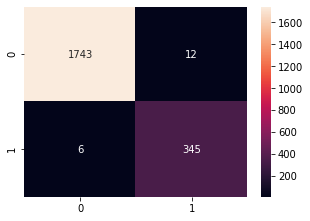

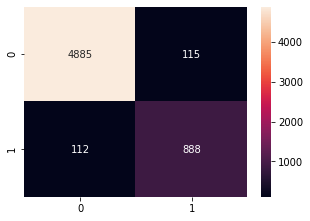

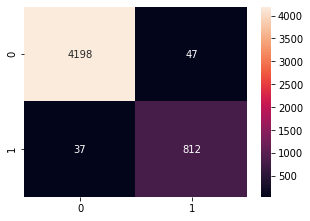

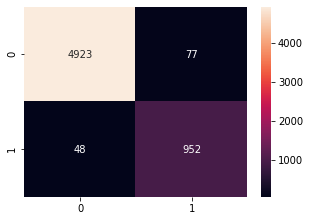

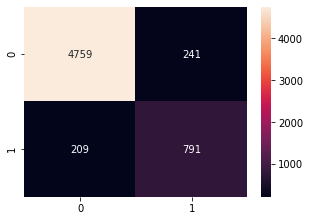

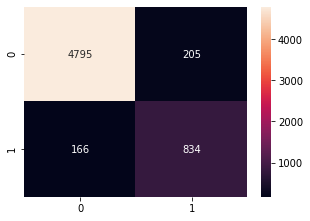

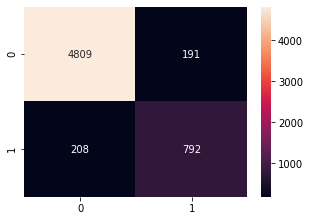

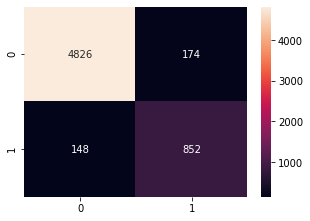

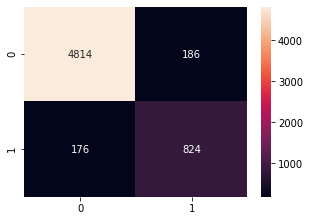

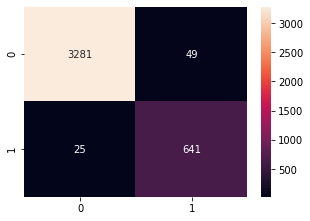

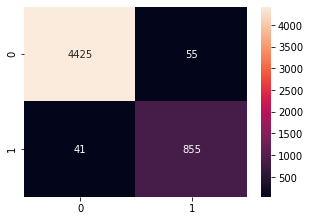

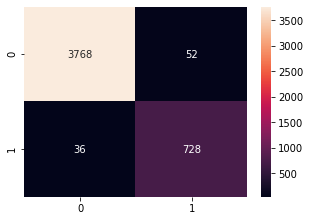

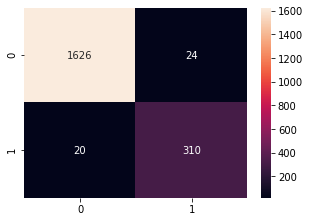

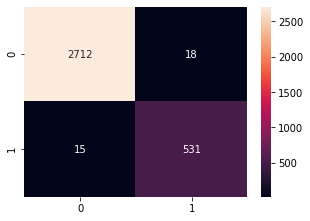

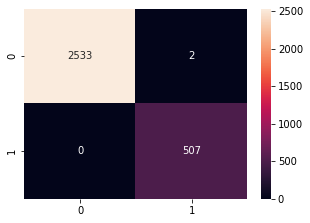

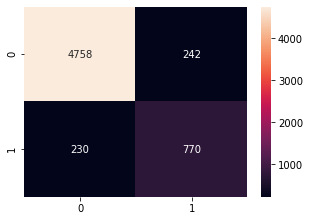

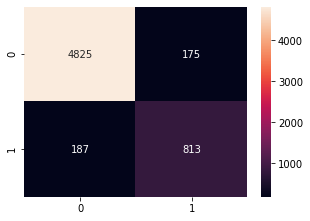

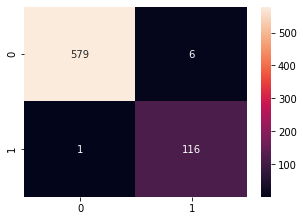

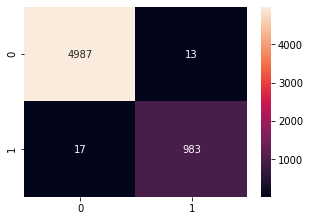

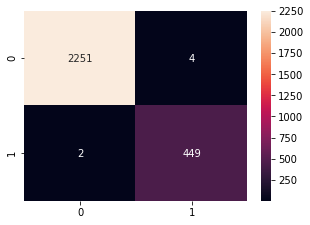

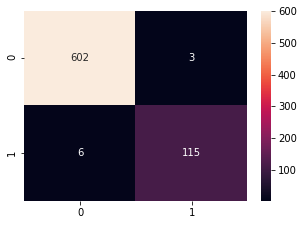

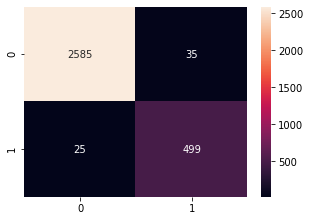

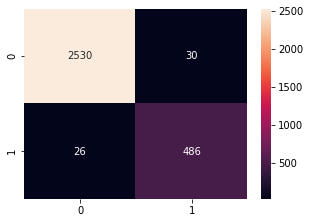

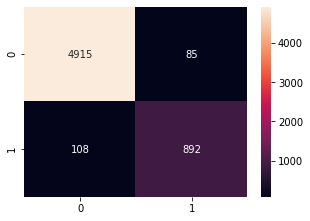

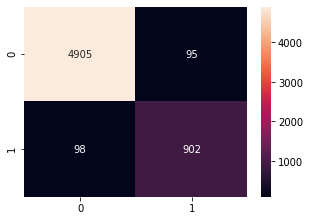

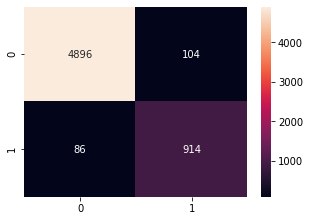

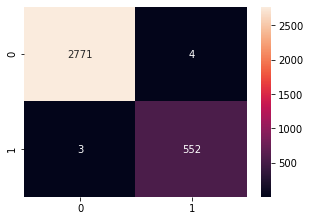

In [44]:
for i in name_list:
    step=1
    Tree=True # It uses the graphviz library.
    output_csv="./results/"+i[18:-4]+"_"+str(step)+"_"+str(Tree)+".csv"
    target_names=target_name(i)
    ML(i,i,output_csv,features,step,Tree)   

# voting process for device csv files
# each voting action is saved in a separate csv file

In [45]:
from xverse.ensemble import VotingSelector

In [46]:
for i in name_list:
    df=pd.read_csv(i,usecols=features) 
    X =df[df.columns[0:-1]]
    target_names=sorted(list(df[df.columns[-1]].unique()))
    y=df[df.columns[-1]]

    feature_names=df.columns
    
    
    clf = VotingSelector()
    clf.fit(X, y)
    #Selected features
    temp="./results/"+i[18:-4]+"_FI_.csv"
    fi=clf.feature_importances_
    fi.to_csv(temp, index=None)

    temp="./results/"+i[18:-4]+"_VETO_.csv"
    votes=clf.feature_votes_
    votes.to_csv(temp, index=None)
    print(clf.feature_votes_)


   Variable_Name  Information_Value  Random_Forest  \
0       IP_flags                  1              1   
29      pck_size                  1              1   
20   TCP_dataofs                  1              1   
1          IP_DF                  1              1   
23      Protocol                  1              1   
..           ...                ...            ...   
62    BOOTP_secs                  0              0   
61      ICMP_seq                  0              0   
58     ICMP_type                  0              0   
55       TCP_SYN                  0              0   
90         IP_MF                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      6  
29                              1            1           1      1      6  
20                              1            1           1      1      6  
1                               1            1     

    Variable_Name  Information_Value  Random_Forest  \
0           sport                  1              1   
15    DNS_ancount                  1              1   
1       TCP_sport                  1              1   
40  payload_bytes                  1              1   
35      BOOTP_xid                  1              1   
..            ...                ...            ...   
61       ICMP_seq                  0              0   
56       LLC_ssap                  0              0   
54     EAPOL_type                  0              0   
50  EAPOL_version                  0              0   
90          IP_MF                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      6  
15                              1            1           1      1      6  
1                               1            1           1      1      6  
40                              1      

   Variable_Name  Information_Value  Random_Forest  \
0       IP_flags                  1              1   
11         IP_id                  1              1   
32    TCP_chksum                  1              1   
33       TCP_seq                  1              1   
21     BOOTP_xid                  1              1   
..           ...                ...            ...   
61      ICMP_seq                  0              0   
60   DNS_arcount                  0              0   
59     ICMP_type                  0              0   
56       TCP_RST                  0              0   
90         IP_MF                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      6  
11                              1            1           1      1      6  
32                              1            1           1      1      6  
33                              1            1     

   Variable_Name  Information_Value  Random_Forest  \
0         IP_ttl                  1              1   
16   dport_class                  1              1   
1        UDP_len                  1              1   
34     EAPOL_len                  1              1   
30     TCP_flags                  1              1   
..           ...                ...            ...   
64     ICMP_code                  0              0   
63    BOOTP_secs                  0              0   
62   DNS_arcount                  0              0   
60      ICMP_seq                  0              0   
90         IP_MF                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      6  
16                              1            1           1      1      6  
1                               1            1           1      1      6  
34                              1            1     

    Variable_Name  Information_Value  Random_Forest  \
0       TCP_sport                  1              1   
15      UDP_sport                  1              1   
34         IP_tos                  1              1   
30        TCP_ACK                  1              1   
29       Protocol                  1              1   
..            ...                ...            ...   
62       LLC_ssap                  0              0   
60    DNS_arcount                  0              0   
47  EAPOL_version                  0              0   
46       BOOTP_op                  0              0   
90          IP_MF                  0              0   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
0                               1            1           1      1      6  
15                              1            1           1      1      6  
34                              1            1           1      1      6  
30                              1      

In [47]:
df.columns

Index(['pck_size', 'Ether_type', 'LLC_dsap', 'LLC_ssap', 'LLC_ctrl',
       'EAPOL_version', 'EAPOL_type', 'EAPOL_len', 'IP_version', 'IP_ihl',
       'IP_tos', 'IP_len', 'IP_flags', 'IP_Z', 'IP_MF', 'IP_id', 'IP_DF',
       'IP_frag', 'IP_ttl', 'IP_proto', 'IP_options', 'ICMP_type', 'ICMP_code',
       'ICMP_chksum', 'ICMP_id', 'ICMP_seq', 'ICMP_ts_ori', 'ICMP_ts_rx',
       'ICMP_ts_tx', 'ICMP_ptr', 'ICMP_reserved', 'ICMP_length',
       'ICMP_nexthopmtu', 'ICMP_unused', 'TCP_seq', 'TCP_ack', 'TCP_dataofs',
       'TCP_reserved', 'TCP_flags', 'TCP_FIN', 'TCP_SYN', 'TCP_RST', 'TCP_PSH',
       'TCP_ACK', 'TCP_URG', 'TCP_ECE', 'TCP_CWR', 'TCP_window', 'TCP_chksum',
       'TCP_urgptr', 'TCP_options', 'UDP_len', 'UDP_chksum', 'DHCP_options',
       'BOOTP_op', 'BOOTP_htype', 'BOOTP_hlen', 'BOOTP_hops', 'BOOTP_xid',
       'BOOTP_secs', 'BOOTP_flags', 'BOOTP_sname', 'BOOTP_file',
       'BOOTP_options', 'DNS_length', 'DNS_id', 'DNS_qr', 'DNS_opcode',
       'DNS_aa', 'DNS_tc', 'DNS_rd', 

# calculate the average of the votes

In [48]:
name_list=find_the_way('./results/','_VETO_.csv')
name_list

['./results/Aria_VETO_.csv',
 './results/D-LinkCam_VETO_.csv',
 './results/D-LinkDayCam_VETO_.csv',
 './results/D-LinkDoorSensor_VETO_.csv',
 './results/D-LinkHomeHub_VETO_.csv',
 './results/D-LinkSensor_VETO_.csv',
 './results/D-LinkSiren_VETO_.csv',
 './results/D-LinkSwitch_VETO_.csv',
 './results/D-LinkWaterSensor_VETO_.csv',
 './results/EdimaxCam_VETO_.csv',
 './results/EdimaxPlug1101W_VETO_.csv',
 './results/EdimaxPlug2101W_VETO_.csv',
 './results/EdnetCam_VETO_.csv',
 './results/EdnetGateway_VETO_.csv',
 './results/HomeMaticPlug_VETO_.csv',
 './results/HueBridge_VETO_.csv',
 './results/HueSwitch_VETO_.csv',
 './results/IKettle2_VETO_.csv',
 './results/Lightify_VETO_.csv',
 './results/MAXGateway_VETO_.csv',
 './results/SmarterCoffee_VETO_.csv',
 './results/TP-LinkPlugHS100_VETO_.csv',
 './results/TP-LinkPlugHS110_VETO_.csv',
 './results/WeMoInsightSwitch_VETO_.csv',
 './results/WeMoLink_VETO_.csv',
 './results/WeMoSwitch_VETO_.csv',
 './results/Withings_VETO_.csv']

In [49]:
df_add = pd.DataFrame(columns=[ 'Information_Value', 'Random_Forest',
       'Recursive_Feature_Elimination', 'Extra_Trees', 'Chi_Square', 'L_One',
       'Votes'])

flag=1
for i in name_list:
    df = pd.read_csv(i, index_col=0)
    df=df.sort_index()    
    df_add= df_add.add(df, fill_value=0)
    


In [50]:
df=df_add/27
df=df.sort_values(['Votes'], ascending=[False])
df.to_csv("veto_average_results.csv")

In [51]:
df

,Information_Value,Random_Forest,Recursive_Feature_Elimination,Extra_Trees,Chi_Square,L_One,Votes
Variable_Name,,,,,,,
TCP_sport,1,1,1,1,1,0.962963,5.96296
TCP_dport,1,1,1,0.925926,1,1,5.92593
sport,0.962963,1,1,1,0.962963,1,5.92593
dport,1,1,1,1,0.888889,1,5.88889
UDP_sport,0.925926,1,1,1,0.962963,1,5.88889
...,...,...,...,...,...,...,...
ICMP_ts_ori,0,0,0,0,0,0,0
ICMP_ts_rx,0,0,0,0,0,0,0
ICMP_ts_tx,0,0,0,0,0,0,0


# Creating the voting process result graph

In [52]:
data = pd.read_csv("veto_average_results.csv")
new = data[['Variable_Name', 'Votes']].copy()

new

,Variable_Name,Votes
0,TCP_sport,5.962963
1,TCP_dport,5.925926
2,sport,5.925926
3,dport,5.888889
4,UDP_sport,5.888889
...,...,...
86,ICMP_ts_ori,0.000000
87,ICMP_ts_rx,0.000000
88,ICMP_ts_tx,0.000000
89,ICMP_unused,0.000000


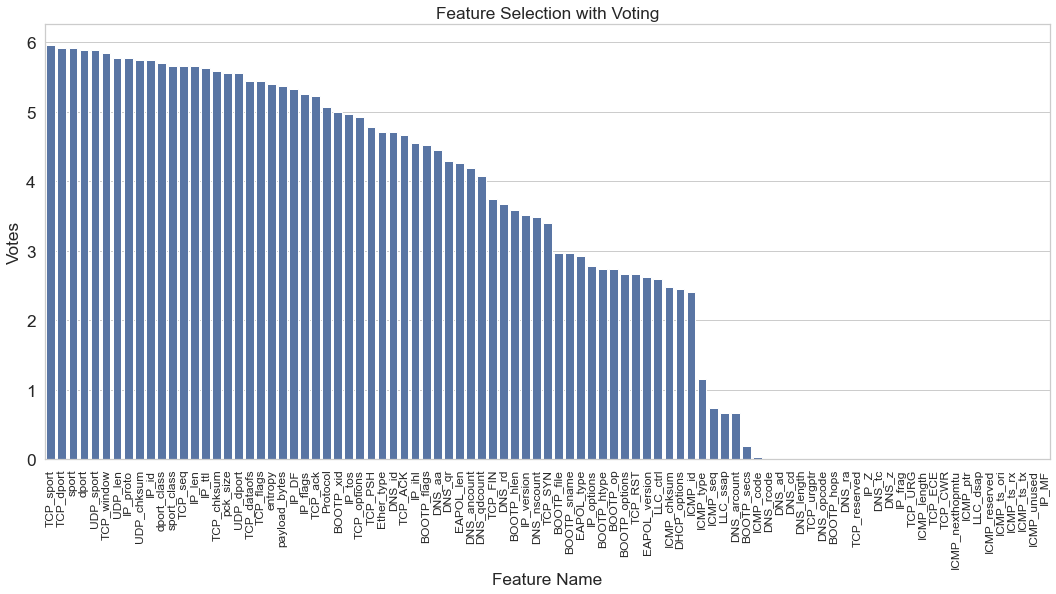

In [53]:
graph_name="Feature Selection with Voting.PDF"
import seaborn as sns
sns.set_theme(style="whitegrid")

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.figure(figsize=(18,8))
plt.title("Feature Selection with Voting")

plt.ylabel('Voting Average')
plt.xticks(rotation=90) 
ax = sns.barplot(x="Variable_Name",color='b', y="Votes", data=new)
plt.xlabel('Feature Name')
plt.savefig(graph_name,bbox_inches='tight',format="pdf")#, dpi=400)
plt.show()